In [63]:
# prompt: pip install lightgbm

!pip install lightgbm


In [64]:
# prompt: pip install xg boost

!pip install xgboost


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score,recall_score,f1_score

In [66]:
df = pd.read_csv('Titanic_train.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [67]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [70]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())  # Replace with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())  # Replace with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Replace with mode

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

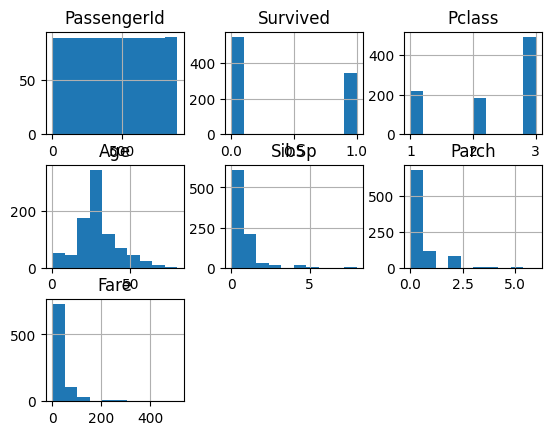

In [72]:
df.hist()

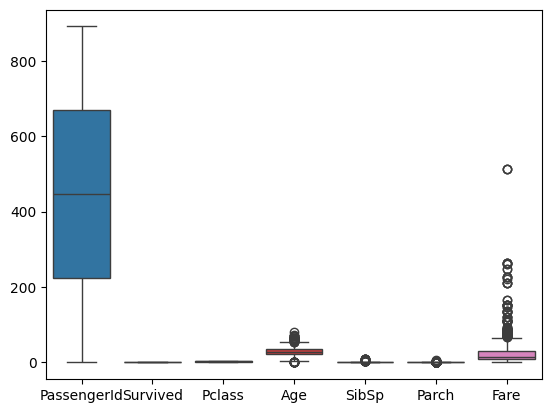

In [73]:
sns.boxplot(data=df)
plt.show()

In [74]:
df.fillna(df.mean)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare  \
0        0         A/5 21171   7.2500   
1        0          PC 17599  71.2833   
2        0  STON/O2. 3101282   7.9250   
3        0            113803  53.1000   
4        0            373450   8.0500   
..     ...               ...      ...   
886      0            211536  13.0000   
887      0            112053  30.0000   
888      2        W./C. 6607  23.4500   
889      0            111369  30.0000   
890      0            370376   7.7500   

                                                 Cabin Embarked  
0    <bound method DataFrame.mean of      Passenger...        S  
1                                                  C85        C  
2    <bound method DataFrame.mean of      Passenger...        S  
3                                                 C123        S  
4    <bound method DataFrame.mean of      Passenger...        S  
..                                                 ...      ...  
886  <bound method DataFrame.mean of      Passenger...        S  
887                                                B42        S  
888  <bound method DataFrame.mean of      Passenger...        S  
889                                               C148        C  
890  <bound method DataFrame.mean of      Passenger...        Q  

[891 rows x 12 columns]

In [75]:
df_numeric=df.select_dtypes(include=np.number)

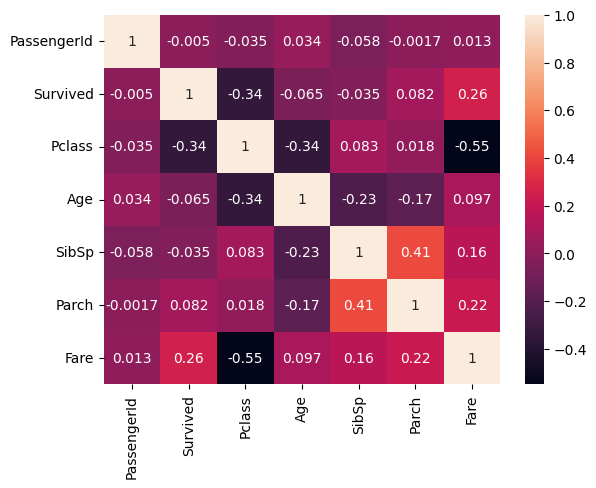

In [76]:
sns.heatmap(df_numeric.corr(),annot=True)
plt.show()

In [77]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    0  27.0      0   
887                       Graham, Miss. Margaret Edith    1  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1  28.0      1   
889                              Behr, Mr. Karl Howell    0  26.0      0   
890                                Dooley, Mr. Patrick    0  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [78]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [79]:
df = df.drop(columns=['Name', 'Ticket'])
df

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    0  22.0      1      0   7.2500   NaN   
1              2         1       1    1  38.0      1      0  71.2833   C85   
2              3         1       3    1  26.0      0      0   7.9250   NaN   
3              4         1       1    1  35.0      1      0  53.1000  C123   
4              5         0       3    0  35.0      0      0   8.0500   NaN   
..           ...       ...     ...  ...   ...    ...    ...      ...   ...   
886          887         0       2    0  27.0      0      0  13.0000   NaN   
887          888         1       1    1  19.0      0      0  30.0000   B42   
888          889         0       3    1  28.0      1      2  23.4500   NaN   
889          890         1       1    0  26.0      0      0  30.0000  C148   
890          891         0       3    0  32.0      0      0   7.7500   NaN   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 10 columns]

In [88]:
x = df.drop(columns=['Survived'])
y= df['Survived']
x

PassengerId  Pclass   Age  SibSp  Parch     Fare Cabin  Sex_1  \
0              1       3  22.0      1      0   7.2500   NaN  False   
1              2       1  38.0      1      0  71.2833   C85   True   
2              3       3  26.0      0      0   7.9250   NaN   True   
3              4       1  35.0      1      0  53.1000  C123   True   
4              5       3  35.0      0      0   8.0500   NaN  False   
..           ...     ...   ...    ...    ...      ...   ...    ...   
886          887       2  27.0      0      0  13.0000   NaN  False   
887          888       1  19.0      0      0  30.0000   B42   True   
888          889       3  28.0      1      2  23.4500   NaN   True   
889          890       1  26.0      0      0  30.0000  C148  False   
890          891       3  32.0      0      0   7.7500   NaN  False   

     Embarked_Q  Embarked_S  
0         False        True  
1         False       False  
2         False        True  
3         False        True  
4         False        True  
..          ...         ...  
886       False        True  
887       False        True  
888       False        True  
889       False       False  
890        True       False  

[891 rows x 10 columns]

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [90]:
x_train

PassengerId  Pclass   Age  SibSp  Parch      Fare    Cabin  Sex_1  \
331          332       1  45.5      0      0   28.5000     C124  False   
733          734       2  23.0      0      0   13.0000      NaN  False   
382          383       3  32.0      0      0    7.9250      NaN  False   
704          705       3  26.0      1      0    7.8542      NaN  False   
813          814       3   6.0      4      2   31.2750      NaN   True   
..           ...     ...   ...    ...    ...       ...      ...    ...   
106          107       3  21.0      0      0    7.6500      NaN   True   
270          271       1  28.0      0      0   31.0000      NaN  False   
860          861       3  41.0      2      0   14.1083      NaN  False   
435          436       1  14.0      1      2  120.0000  B96 B98   True   
102          103       1  21.0      0      1   77.2875      D26  False   

     Embarked_Q  Embarked_S  
331       False        True  
733       False        True  
382       False        True  
704       False        True  
813       False        True  
..          ...         ...  
106       False        True  
270       False        True  
860       False        True  
435       False        True  
102       False        True  

[712 rows x 10 columns]

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score,recall_score,f1_score

# ... (your previous code for data loading and preprocessing) ...

# Drop the 'Cabin' column from x_train and x_test
x_train = x_train.drop(columns=['Cabin'])  # Drop 'Cabin' from training data
x_test = x_test.drop(columns=['Cabin'])    # Drop 'Cabin' from testing data

# Split the data into training and testing sets
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

# Initialize and train a model (example using Logistic Regression)
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)  # Assign predictions to y_pred

# Calculate and print evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7988826815642458
Precision: 0.7878787878787878
Recall: 0.7027027027027027
F1-Score: 0.7428571428571429


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
# Create a LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(x_train, y_train)

# Make predictions on the test set
lgb_pred = lgb_model.predict(x_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [129]:
# Function to evaluate and print metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("-" * 20)

# Evaluate LightGBM
evaluate_model(y_test, lgb_pred, "LightGBM")

# Evaluate XGBoost
evaluate_model(y_test, xgb_pred, "XGBoost")

LightGBM Metrics:
  Accuracy: 0.7989
  Precision: 0.7794
  Recall: 0.7162
  F1-Score: 0.7465
--------------------
XGBoost Metrics:
  Accuracy: 0.7933
  Precision: 0.7534
  Recall: 0.7432
  F1-Score: 0.7483
--------------------


In [132]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(lgb_model, x_train, y_train, cv=5, scoring='accuracy')

# Print the average accuracy across folds
print("Cross-Validation Accuracy: {:.4f}".format(scores.mean()))

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [133]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV object
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_lgb_model = grid_search.best_estimator_

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [134]:
# Make predictions with the best model
y_pred_optimized = best_lgb_model.predict(x_test)

# Evaluate the optimized model
evaluate_model(y_test, y_pred_optimized, "Optimized LightGBM")

Optimized LightGBM Metrics:
  Accuracy: 0.8156
  Precision: 0.8154
  Recall: 0.7162
  F1-Score: 0.7626
--------------------


In [136]:
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have x_train, x_test, y_train, y_test

# Initialize and train LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)
lgb_pred = lgb_model.predict(x_test)

# Initialize and train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

# Function to evaluate and print metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("-" * 20)

# Evaluate LightGBM
evaluate_model(y_test, lgb_pred, "LightGBM")

# Evaluate XGBoost
evaluate_model(y_test, xgb_pred, "XGBoost")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


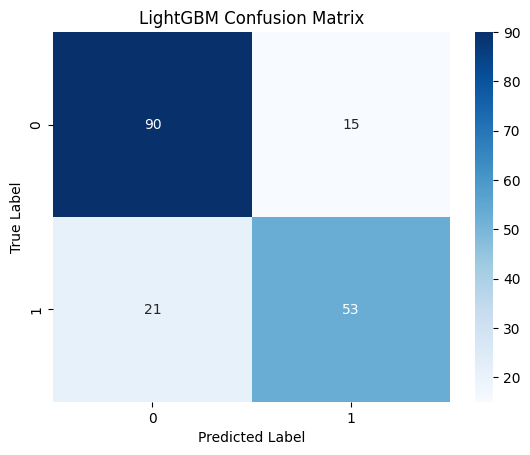

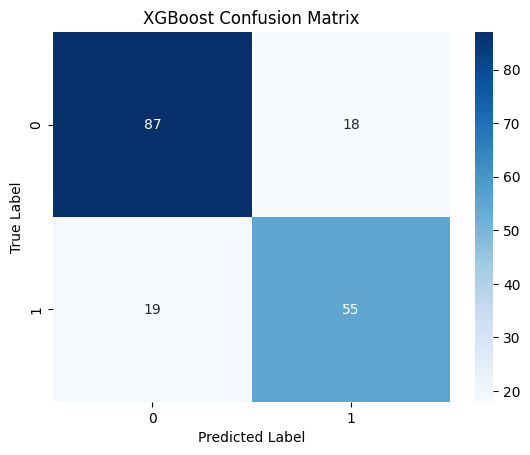

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# LightGBM Confusion Matrix
lgb_cm = confusion_matrix(y_test, lgb_pred)
sns.heatmap(lgb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# XGBoost Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



> Add blockquote
**Accuracy: Reflects overall model performance in predicting both classes.
Precision & Recall: Precision indicates the ability to avoid false positives, while recall shows the ability to capture all true positives.
F1 Score: Balances precision and recall, giving insight into model consistency.**

